In [31]:
from dataset import *


In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
raw_synthetic_dataset = FinancialDataset(synthetic=True, n_simul=10)
raw_real_dataset = FinancialDataset(synthetic=False)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [34]:
synthetic_data = raw_synthetic_dataset.dataset
synthetic_data

tensor([[[-0.0098, -0.0077],
         [-0.0315, -0.0219],
         [-0.0176, -0.0072],
         ...,
         [-0.0244, -0.0121],
         [ 0.0172,  0.0398],
         [ 0.0039,  0.0191]],

        [[-0.0252,  0.0103],
         [ 0.0092, -0.0174],
         [ 0.0055, -0.0013],
         ...,
         [-0.0304, -0.0197],
         [-0.0058, -0.0076],
         [-0.0182,  0.0197]],

        [[ 0.0077,  0.0011],
         [ 0.0124,  0.0095],
         [ 0.0399,  0.0122],
         ...,
         [-0.0104,  0.0065],
         [ 0.0045,  0.0075],
         [ 0.0454,  0.0187]],

        ...,

        [[ 0.0444,  0.0175],
         [-0.0096, -0.0252],
         [-0.0298, -0.0021],
         ...,
         [-0.0200,  0.0202],
         [ 0.0093,  0.0340],
         [-0.0258,  0.0005]],

        [[ 0.0218,  0.0183],
         [ 0.0098, -0.0258],
         [ 0.0222,  0.0084],
         ...,
         [ 0.0028,  0.0121],
         [ 0.0338,  0.0038],
         [ 0.0139,  0.0009]],

        [[ 0.0316, -0.0039],
       

In [35]:
synthetic_data.shape

torch.Size([10, 4000, 2])

In [36]:
real_data = raw_real_dataset.dataset
real_data


tensor([[[-0.0077,  0.0366],
         [ 0.0051,  0.0158],
         [ 0.0205, -0.0050],
         ...,
         [-0.0007,  0.0152],
         [ 0.0119,  0.0175],
         [-0.0196,  0.0006]]])

In [37]:
real_data.shape

torch.Size([1, 3791, 2])

In [38]:
import pandas as pd
date_source = pd.date_range(start='2006-03-01', periods=real_data.shape[1], freq="B")
date_source

DatetimeIndex(['2006-03-01', '2006-03-02', '2006-03-03', '2006-03-06',
               '2006-03-07', '2006-03-08', '2006-03-09', '2006-03-10',
               '2006-03-13', '2006-03-14',
               ...
               '2020-08-27', '2020-08-28', '2020-08-31', '2020-09-01',
               '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-07',
               '2020-09-08', '2020-09-09'],
              dtype='datetime64[ns]', length=3791, freq='B')

In [39]:
raw_real_dataset._raw_data['returns']

,AIR.PA_rt,MC.PA_rt
Date,,
2006-03-02,-0.007660,0.036577
2006-03-03,0.005146,0.015753
2006-03-06,0.020480,-0.004963
2006-03-07,-0.005331,-0.008105
2006-03-08,-0.017654,-0.015085
...,...,...
2020-12-23,0.045599,0.007719
2020-12-24,0.000979,0.000706
2020-12-28,-0.000652,0.015208


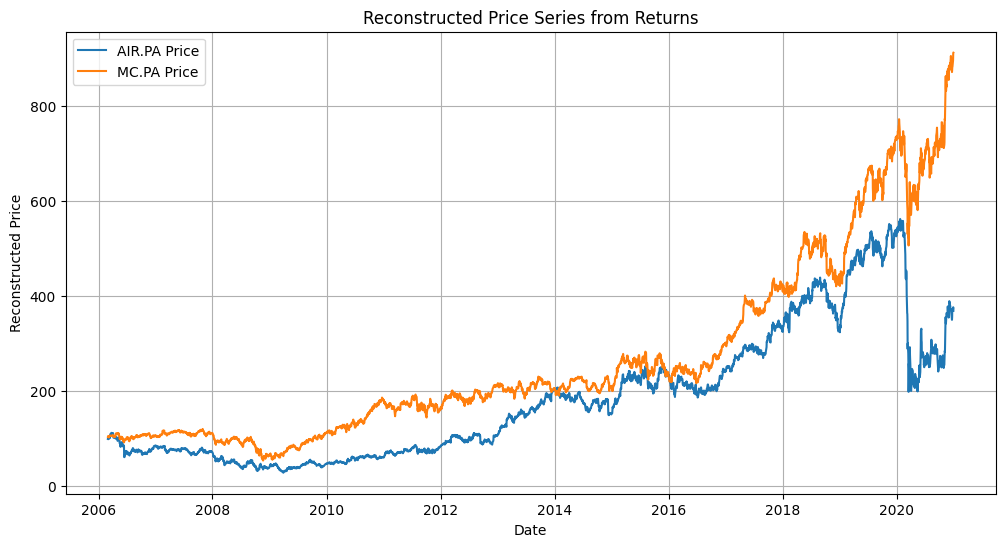

In [40]:
import matplotlib.pyplot as plt

df = raw_real_dataset._raw_data['returns'].copy()

initial_price = 100

# Compute cumulative returns for each stock
price_df = (1 + df).cumprod() * initial_price

# Plot the reconstructed price series
plt.figure(figsize=(12, 6))
plt.plot(price_df.index, price_df['AIR.PA_rt'], label='AIR.PA Price')
plt.plot(price_df.index, price_df['MC.PA_rt'], label='MC.PA Price')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Reconstructed Price')
plt.title('Reconstructed Price Series from Returns')
plt.legend()
plt.grid()
plt.show()

# To print the price you need the dataloader because it has the indices :))

In [41]:
real_dataloader = DataHandler(dataset=raw_real_dataset, batch_size = 3, is_synthetic=False)

In [42]:
synthetic_dataloader = DataHandler(dataset=raw_synthetic_dataset, batch_size = 3, is_synthetic=True)

In [43]:
raw_synthetic_dataset._raw_data['returns']

,AIR.PA_rt,MC.PA_rt
Date,,
2006-03-02,-0.007660,0.036577
2006-03-03,0.005146,0.015753
2006-03-06,0.020480,-0.004963
2006-03-07,-0.005331,-0.008105
2006-03-08,-0.017654,-0.015085
...,...,...
2020-12-23,0.045599,0.007719
2020-12-24,0.000979,0.000706
2020-12-28,-0.000652,0.015208


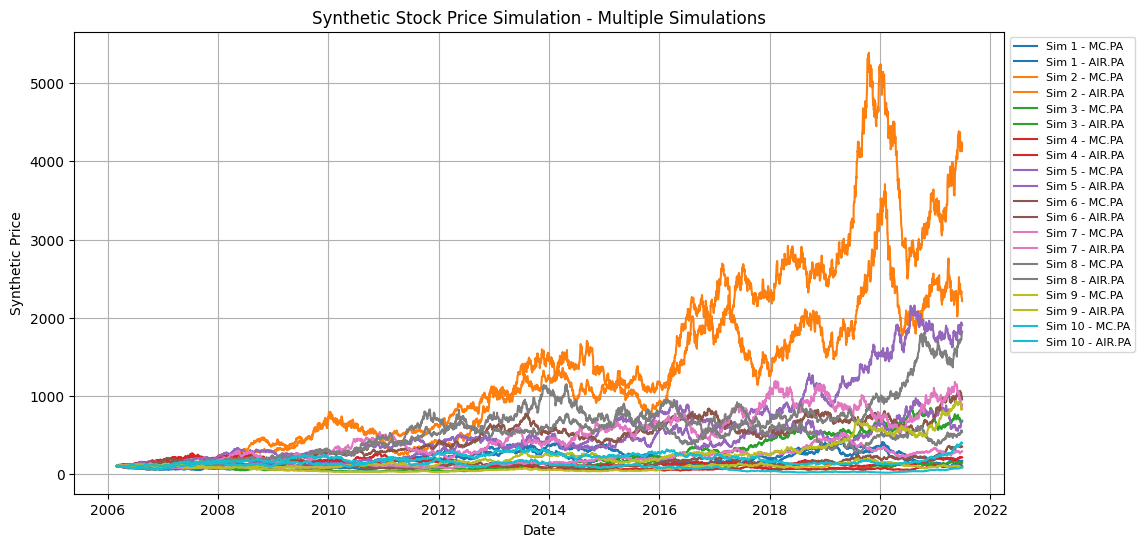

In [44]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert synthetic data to NumPy (Shape: n_simul, n_dates, n_assets)
synthetic_returns = synthetic_data.numpy()  # Shape: (n_simul, n_dates, n_assets)

# Get the number of simulations, dates, and assets
n_simul, n_dates, n_assets = synthetic_returns.shape

# Get the date index from DataHandler
date_range = synthetic_dataloader.date_range

# Convert Returns to Prices for All Simulations (Assume Initial Price = 100)
initial_price = 100
synthetic_prices = initial_price * (1 + synthetic_returns).cumprod(axis=1)  # Cumprod over time (axis=1)

# Plot the price series for each simulation and asset
plt.figure(figsize=(12, 6))

# Use different colors for each simulation and asset
colors = plt.get_cmap("tab10", n_simul * n_assets)  # Generate colors

for sim in range(n_simul):
    for asset_idx, ticker in enumerate(raw_synthetic_dataset.tickers):
        plt.plot(date_range, synthetic_prices[sim, :, asset_idx], 
                 label=f"Sim {sim+1} - {ticker}", color=colors(sim * n_assets + asset_idx))

# Formatting
plt.xlabel("Date")
plt.ylabel("Synthetic Price")
plt.title("Synthetic Stock Price Simulation - Multiple Simulations")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))  # Legend outside the plot
plt.grid()
plt.show()


In [45]:
dataloader, X_test, (start_training, end_training, start_invest, end_invest) = real_dataloader.loader_period()

Training period from 2006-03-02 00:00:00 to 2010-02-12 00:00:00
Investment period from 2010-02-12 00:00:00 to 2012-01-30 00:00:00


In [46]:
(start_training, end_training, start_invest, end_invest)

(Timestamp('2006-03-02 00:00:00'),
 Timestamp('2010-02-12 00:00:00'),
 Timestamp('2010-02-12 00:00:00'),
 Timestamp('2012-01-30 00:00:00'))

In [47]:
X_test.shape

torch.Size([504, 50, 2])

In [48]:
c=0
for batch_x, batch_y in dataloader: 
    c+=1
    print(batch_x.shape, batch_y.shape)
print(c)

torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size([3, 50, 2])
torch.Size([3, 50, 2]) torch.Size(

In [49]:
from models import *
from trainer import *  

lstm = NN_Sharpe()
trainer = PortfolioTrainer(model = lstm, data_handler=synthetic_dataloader, permute_assets=False, epochs = 10, lr = 0.001, weight_decay= 0.2 )

Training period from 2006-03-01 00:00:00 to 2010-01-11 00:00:00
Investment period from 2010-01-11 00:00:00 to 2011-12-16 00:00:00


 10%|█         | 1/10 [00:10<01:30, 10.01s/it]

Loss_epoch:= -0.04346878383248594


 20%|██        | 2/10 [00:20<01:20, 10.07s/it]

Loss_epoch:= -0.04450597039590634


 30%|███       | 3/10 [00:31<01:15, 10.72s/it]

Loss_epoch:= -0.04442970318280496


 40%|████      | 4/10 [00:41<01:01, 10.21s/it]

Loss_epoch:= -0.04447636865569789


 50%|█████     | 5/10 [00:50<00:49,  9.87s/it]

Loss_epoch:= -0.04449627600416793


 60%|██████    | 6/10 [00:59<00:38,  9.68s/it]

Loss_epoch:= -0.044455095542521965


 70%|███████   | 7/10 [01:09<00:28,  9.60s/it]

Loss_epoch:= -0.0444792357183759


 80%|████████  | 8/10 [01:18<00:19,  9.51s/it]

Loss_epoch:= -0.04448717401260226


 90%|█████████ | 9/10 [01:27<00:09,  9.39s/it]

Loss_epoch:= -0.04445357136330108


100%|██████████| 10/10 [01:36<00:00,  9.66s/it]

Loss_epoch:= -0.04450301259914745


alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])
Training period from 2010-01-11 00:00:00 to 2011-12-16 00:00:00
Investment period from 2011-12-16 00:00:00 to 2013-11-21 00:00:00


 10%|█         | 1/10 [00:04<00:39,  4.36s/it]

Loss_epoch:= -0.03354298516642182


 20%|██        | 2/10 [00:08<00:34,  4.33s/it]

Loss_epoch:= -0.03444314026218856


 30%|███       | 3/10 [00:13<00:31,  4.45s/it]

Loss_epoch:= -0.03434584444377038


 40%|████      | 4/10 [00:17<00:26,  4.48s/it]

Loss_epoch:= -0.034393983325248914


 50%|█████     | 5/10 [00:23<00:24,  4.84s/it]

Loss_epoch:= -0.03439199515455615


 60%|██████    | 6/10 [00:28<00:19,  4.94s/it]

Loss_epoch:= -0.03439216870303414


 70%|███████   | 7/10 [00:33<00:15,  5.12s/it]

Loss_epoch:= -0.0343898316687901


 80%|████████  | 8/10 [00:39<00:10,  5.23s/it]

Loss_epoch:= -0.034433154606741054


 90%|█████████ | 9/10 [00:44<00:05,  5.36s/it]

Loss_epoch:= -0.03444480261798813


100%|██████████| 10/10 [00:50<00:00,  5.04s/it]

Loss_epoch:= -0.034398269631814075


alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])
Training period from 2011-12-16 00:00:00 to 2013-11-21 00:00:00
Investment period from 2013-11-21 00:00:00 to 2015-10-28 00:00:00


 10%|█         | 1/10 [00:05<00:45,  5.01s/it]

Loss_epoch:= -0.050766134174330166


 20%|██        | 2/10 [00:09<00:38,  4.87s/it]

Loss_epoch:= -0.050860964671354196


 30%|███       | 3/10 [00:14<00:34,  4.97s/it]

Loss_epoch:= -0.05082736730452978


 40%|████      | 4/10 [00:20<00:30,  5.08s/it]

Loss_epoch:= -0.05084637197374254


 50%|█████     | 5/10 [00:25<00:25,  5.09s/it]

Loss_epoch:= -0.05083317989367831


 60%|██████    | 6/10 [00:30<00:19,  4.98s/it]

Loss_epoch:= -0.05081755002098988


 70%|███████   | 7/10 [00:34<00:14,  4.95s/it]

Loss_epoch:= -0.05081735882706472


 80%|████████  | 8/10 [00:39<00:09,  4.81s/it]

Loss_epoch:= -0.05083458363999037


 90%|█████████ | 9/10 [00:43<00:04,  4.69s/it]

Loss_epoch:= -0.050817753291659565


100%|██████████| 10/10 [00:48<00:00,  4.84s/it]

Loss_epoch:= -0.05081286437145283


alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])
Training period from 2013-11-21 00:00:00 to 2015-10-28 00:00:00
Investment period from 2015-10-28 00:00:00 to 2017-10-03 00:00:00


 10%|█         | 1/10 [00:05<00:51,  5.73s/it]

Loss_epoch:= -0.010170276478373921


 20%|██        | 2/10 [00:10<00:42,  5.27s/it]

Loss_epoch:= -0.010712791579202687


 30%|███       | 3/10 [00:15<00:35,  5.06s/it]

Loss_epoch:= -0.011073624046609939


 40%|████      | 4/10 [00:21<00:32,  5.42s/it]

Loss_epoch:= -0.0113056047669964


 50%|█████     | 5/10 [00:26<00:26,  5.28s/it]

Loss_epoch:= -0.011428347465086655


 60%|██████    | 6/10 [00:31<00:20,  5.19s/it]

Loss_epoch:= -0.011490775411232109


 70%|███████   | 7/10 [00:38<00:17,  5.94s/it]

Loss_epoch:= -0.011547629085462117


 80%|████████  | 8/10 [00:45<00:12,  6.18s/it]

Loss_epoch:= -0.011613290102464464


 90%|█████████ | 9/10 [00:51<00:06,  6.20s/it]

Loss_epoch:= -0.011648435087142046


100%|██████████| 10/10 [00:57<00:00,  5.75s/it]

Loss_epoch:= -0.011629749255588113


alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])
Training period from 2015-10-28 00:00:00 to 2017-10-03 00:00:00
Investment period from 2017-10-03 00:00:00 to 2019-09-09 00:00:00


 10%|█         | 1/10 [00:05<00:50,  5.66s/it]

Loss_epoch:= -0.026455376703153212


 20%|██        | 2/10 [00:11<00:44,  5.52s/it]

Loss_epoch:= -0.026411987648095152


 30%|███       | 3/10 [00:16<00:39,  5.57s/it]

Loss_epoch:= -0.02640762207759309


 40%|████      | 4/10 [00:24<00:39,  6.53s/it]

Loss_epoch:= -0.02641406114400332


 50%|█████     | 5/10 [00:30<00:31,  6.32s/it]

Loss_epoch:= -0.026436254647113258


 60%|██████    | 6/10 [00:38<00:26,  6.69s/it]

Loss_epoch:= -0.026431350427981743


 70%|███████   | 7/10 [00:47<00:22,  7.60s/it]

Loss_epoch:= -0.0263910568294253


 80%|████████  | 8/10 [00:53<00:14,  7.23s/it]

Loss_epoch:= -0.02643198398947415


 90%|█████████ | 9/10 [01:00<00:06,  6.87s/it]

Loss_epoch:= -0.026414195204728794


100%|██████████| 10/10 [01:07<00:00,  6.76s/it]

Loss_epoch:= -0.026395918633431773


alloc_test shape: torch.Size([5040, 2])
Filtered dates count: 504, Expected alloc_test count: 5040
alloc_test shape: torch.Size([10, 504, 2])


In [50]:
result = trainer.result

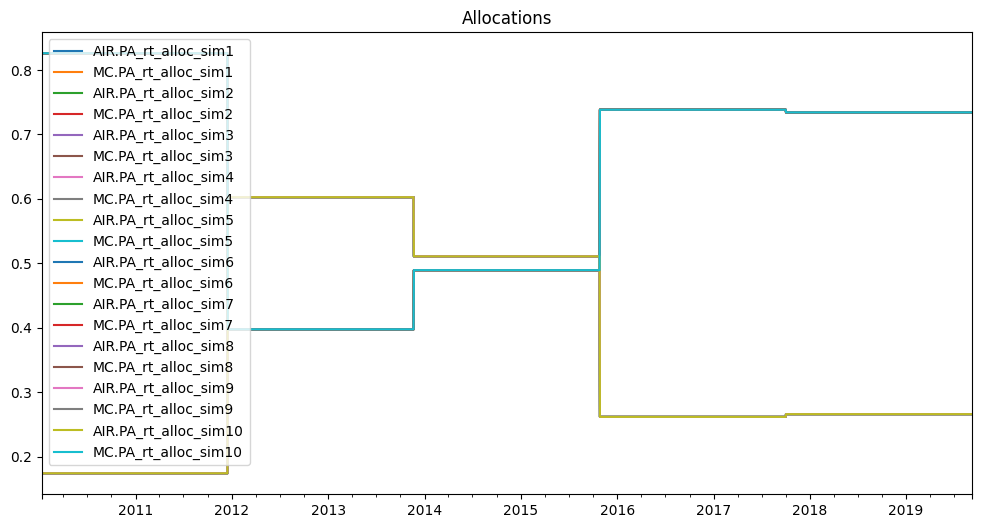

In [51]:
result.plot(figsize=(12,6), title="Allocations")
plt.show()
